# Importing Libraries

In [1]:
import pandas as pd
import nltk 
nltk.download('stopwords')                 # download the stopwords from NLTK

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

from sklearn.linear_model import LogisticRegression  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv('/content/alexa_review.csv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# Data Processing

In [5]:
df1 = df.drop(['rating', 'date', 'variation'], axis = 1)
df1

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [6]:
df1.isnull().sum()

verified_reviews    0
feedback            0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3150 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [8]:
df1.feedback.unique()

array([1, 0])

__Function to Process the reviews__

In [9]:
def process_rev(rev):
    """Process review function.
    Input:
        rev: a string containing a review
    Output:
        rev_clean: a list of words containing the processed review

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # tokenize reviews
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    rev_tokens = tokenizer.tokenize(rev)

    rev_clean = []
    for word in rev_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # rev_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            rev_clean.append(stem_word)

    return rev_clean

In [12]:
# using the process_rev function for:
# 1. Removing stop words
# 2. Tokenization
# 3. Stemming
A = []
a = df['verified_reviews']
for i in a:
  i = process_rev(i)
  A.append(i)
df1['verified_reviews_processed'] = A
df1

,verified_reviews,feedback,verified_reviews_processed
0,Love my Echo!,1,"[love, echo]"
1,Loved it!,1,[love]
2,"Sometimes while playing a game, you can answer...",1,"[sometim, play, game, answer, question, correc..."
3,I have had a lot of fun with this thing. My 4 ...,1,"[lot, fun, thing, 4, yr, old, learn, dinosaur,..."
4,Music,1,[music]
...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,"[perfect, kid, adult, everyon]"
3146,"Listening to music, searching locations, check...",1,"[listen, music, search, locat, check, time, lo..."
3147,"I do love these things, i have them running my...",1,"[love, thing, run, entir, home, tv, light, the..."
3148,Only complaint I have is that the sound qualit...,1,"[complaint, sound, qualiti, great, mostli, use..."


In [13]:
del df1['verified_reviews']

In [15]:
df1

,feedback,verified_reviews_processed
0,1,"[love, echo]"
1,1,[love]
2,1,"[sometim, play, game, answer, question, correc..."
3,1,"[lot, fun, thing, 4, yr, old, learn, dinosaur,..."
4,1,[music]
...,...,...
3145,1,"[perfect, kid, adult, everyon]"
3146,1,"[listen, music, search, locat, check, time, lo..."
3147,1,"[love, thing, run, entir, home, tv, light, the..."
3148,1,"[complaint, sound, qualiti, great, mostli, use..."


## Vectorization

In [16]:
cv = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

In [17]:
df1['verified_reviews_processed'] = df1['verified_reviews_processed'].apply(lambda x: " ".join(x) )  # to join all words in the lists
X = cv.fit_transform(df1['verified_reviews_processed'])  # predictor variable 'X'

In [26]:
X

<3150x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 33871 stored elements in Compressed Sparse Row format>

In [19]:
y = pd.DataFrame(df['feedback'])  # response variable 'y'
y.head()

,feedback
0,1
1,1
2,1
3,1
4,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 

# Model

In [21]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
roc_auc_score(y_test, y_pred)

0.6825810185185184

## Visualization of confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 20,  34],
       [  3, 573]])

Text(0.5, 1.0, 'Accuracy Score: 0.6825810185185184')

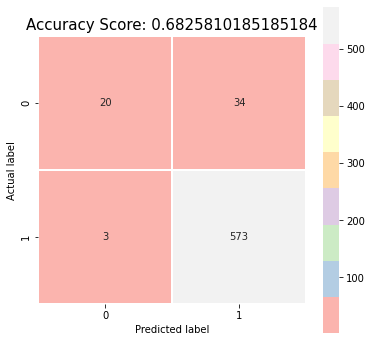

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(roc_auc_score(y_test, y_pred))
plt.title(all_sample_title, size = 15)